In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score,roc_curve,auc,precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, StratifiedKFold
from sklearn.ensemble import VotingRegressor, VotingClassifier, StackingRegressor, StackingClassifier, GradientBoostingRegressor,GradientBoostingClassifier, BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
import itertools as it
import time as time
# from pyearth import Earth
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import PolynomialFeatures
import itertools

In [136]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [137]:
train_copy = train.copy()
test_copy = test.copy()

# Feature engineering

#### Ideas for what we can do:
- how to manipulate null data
- outliers
- look at different predictors, only use the ones that are helpful (density map?)


#### Feature Engineering Techniques for Machine Learning
1) Imputation

2) Discretization

3) Categorical Encoding

4) Feature Splitting

5) Handling Outliers

6) Variable Transformations

7) Scaling 

8) Creating Features

#### Clustering, PCA (reduces dataset but maintaining the same amount of information)

#### Outliers: DBScan

#### Scale data

#### Interaction features (if the interactions merge)

#### Imputation null data 

#### Group by quartiles (numerical values)

### 1 )Drop null data

Ideas? What can we do with null data:
1. Fill with 0
2. Take them out

In [138]:
for i in range(train.shape[1]):
    print(train.columns[i], train.iloc[:,i].isna().sum())

id 0
x001 10
x002 0
x003 3
x004 0
x005 10
x006 0
x007 3
x008 3
x009 53
x010 0
x011 3
x012 53
x013 0
x014 0
x015 22
x016 2
x017 20
x018 81
x019 0
x020 0
x021 3
x022 0
x023 27
x024 11
x025 0
x026 2
x027 3
x028 1
x029 0
x030 5
x031 52
x032 0
x033 0
x034 0
x035 456
x036 0
x037 3
x038 456
x039 0
x040 0
x041 0
x042 0
x043 53
x044 2
x045 0
x046 0
x047 30
x048 60
x049 114
x050 53
x051 71
x052 52
x053 17
x054 0
x055 2
x056 3
x057 3
x058 2
x059 351
x060 3
x061 114
x062 10
x063 0
x064 114
x065 53
x066 2
x067 0
x068 8
x069 3
x070 11
x071 53
x072 0
x073 0
x074 43
x075 71
x076 31
x077 114
x078 3
x079 0
x080 405
x081 11
x082 9
x083 74
x084 53
x085 0
x086 0
x087 10
x088 0
x089 2
x090 763
x091 0
x092 0
x093 0
x094 0
x095 3
x096 0
x097 0
x098 0
x099 2
x100 2
x101 0
x102 0
x103 84
x104 5
x105 0
x106 3
x107 19
x108 17
x109 0
x110 7
x111 39
x112 22
x113 3
x114 0
x115 0
x116 31
x117 10
x118 0
x119 53
x120 53
x121 0
x122 0
x123 3
x124 8
x125 5
x126 22
x127 13
x128 0
x129 22
x130 3
x131 2
x132 20
x133 5
x134 

In [139]:
train = train.fillna(0)

In [140]:
test = test.fillna(0)

In [144]:
X = train.drop(columns = ['y'], axis = 1)
y = train['y']

In [145]:
X

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,1.5707,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1173,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,0.00
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.4582,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.3816,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0100,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,1.3758,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.2230,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.1300,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.2719,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47


<AxesSubplot:>

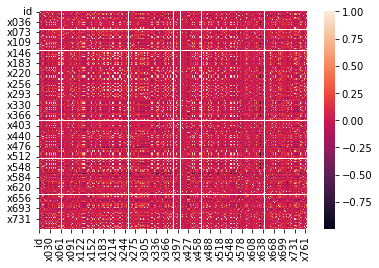

In [148]:
sns.heatmap(X.corr())

In [143]:
## lower score after I try to scale
sc = StandardScaler()

sc.fit(X)

X = sc.transform(X)
test = sc.transform(test)

## 1) Simple linear regression with all predictors

In [128]:
# Simple linear regression

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fit the model
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [129]:
ypred = lr.predict(test)

## 2) Lasso --> alpha = 0.1, score = 9.07334 (best so far) 

In [131]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=.1)
reg.fit(X,y)

Lasso(alpha=0.1)

In [132]:
# Evaluate the model
ypred = reg.predict(test)

In [133]:
pred = pd.DataFrame([test_copy.id, ypred])
pred = pred.transpose()
pred['id'] = pred['id'].astype('int32')
pred.rename(columns = {'Unnamed 0':'y'}, inplace = True)
pred

,id,y
0,5380,8.962584
1,5381,14.161736
2,5382,3.734147
3,5383,6.309775
4,5384,10.198399
...,...,...
4398,9778,5.256188
4399,9779,10.610657
4400,9780,11.904473
4401,9781,12.045127


In [134]:
pred.to_csv('pred.csv', index = False)


## 2) MARS with max_df = 4 (my last year model)

In [90]:
#K-fold cross validation to find optimal degree for MARS
start_time = time.time()

cv_score = {}
for df in range(1,10):
    cv = KFold(n_splits=5, random_state=1, shuffle=True)
    model = Earth(max_terms = 500, max_degree = df, allow_missing = True)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                             cv=cv, n_jobs=-1)
    cv_score[df] = np.mean(-scores)
    
sns.lineplot(np.arange(1,10),list(cv_score.values()))
plt.plot(min(cv_score, key=lambda k: cv_score[k]),min(list(cv_score.values())),marker = 'o',markersize = 8,color = 'r',label = 'Best value of df')
plt.xlabel('Degrees of Freedom')
plt.ylabel('CV ERROR')
plt.legend()

print("Time taken = ", (time.time()-start_time)/60, " minutes")

/Users/hannahzhang/opt/anaconda3/lib/python3.9/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/hannahzhang/opt/anaconda3/lib/python3.9/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/hannahzhang/opt/anaconda3/lib/python3.9/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dime

KeyboardInterrupt: 